# 1. sklearn 사용하지 않고

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

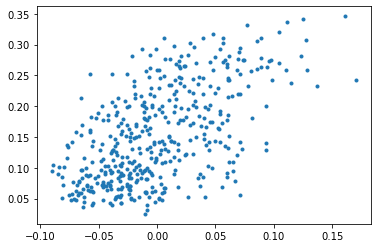

In [3]:
X_p=diabetes.data[:,2] #혈압
X_d=diabetes.target/1000 #당뇨 진행 정도
plt.plot(X_p,X_d,'.')

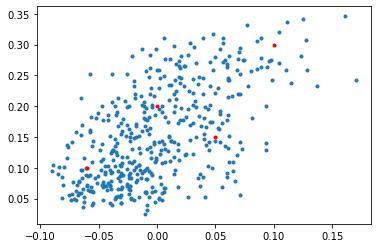

In [4]:
#임의의 점으로 군집화
c1=[-0.06,0.1]; c2=[0.05,0.15]; c3=[0.00,0.2]; c4=[0.10,0.3];
cen=[[-0.06,0.05,0.00,0.10],[0.1,0.15,0.2,0.3]]
plt.plot(X_p,X_d,'.')
plt.plot(cen[0],cen[1],'.',c='r')

In [5]:
def r(a):
    return np.sqrt((X_p-a[0])**2+(X_d-a[1])**2)

In [6]:
min1=np.array([])
for i in range(len(X_p)):
    min1=np.append(min1,np.argmin([r(c1)[i],r(c2)[i],r(c3)[i],r(c4)[i]]))

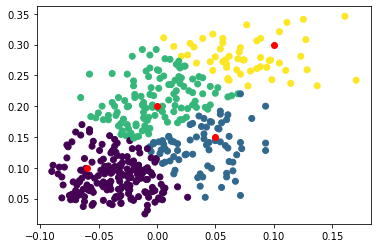

In [7]:
plt.scatter(X_p,X_d,c=min1)
plt.plot(cen[0],cen[1],'ro')

In [8]:
#군집의 중심점 찾고 그 점으로 다시 군집화
new=[]
for i in range(4):
    new.append([np.mean([X_p[j] for j in np.where(min1==i)]),np.mean([X_d[j] for j in np.where(min1==i)])])
new

[[-0.03677453912481339, 0.08523404255319149],
 [0.03787379606521834, 0.13403846153846155],
 [-0.0012321164506037636, 0.21018032786885246],
 [0.07610695313613318, 0.28003703703703703]]

In [9]:
c1_=new[0]; c2_=new[1]; c3_=new[2]; c4_=new[3];
cen_=[[new[0][0],new[1][0],new[2][0],new[3][0]],[new[0][1],new[1][1],new[2][1],new[3][1]]]

In [10]:
min2=np.array([])
for i in range(len(X_p)):
    min2=np.append(min2,np.argmin([r(c1_)[i],r(c2_)[i],r(c3_)[i],r(c4_)[i]]))

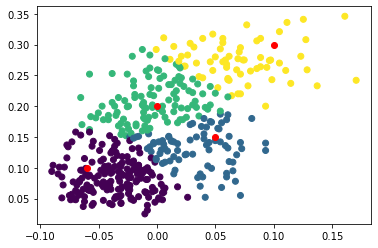

In [11]:
plt.scatter(X_p,X_d,c=min2)
plt.plot(cen[0],cen[1],'ro')

# 2. sklearn 사용

In [12]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters = 4)
X=[X_p,X_d]
data = np.transpose(X)

In [14]:
km.fit(data)

KMeans(n_clusters=4)

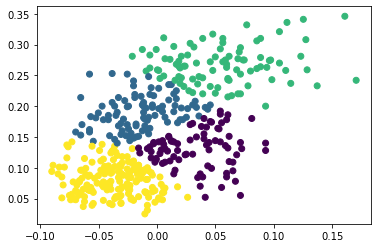

In [15]:
plt.scatter(X_p,X_d,c=km.labels_)

# 3. cluster 수를 결정하는 방법 구상

#### 군집의 중심점까지 평균거리를 구하고 모든 군집의 평균거리를 더한다.
#### cluster값-평균거리 합 그래프를 그린다.
#### linear regression 후 이 기울기보다 작아지는 지점의 cluster값을 택한다.

In [16]:
def r_(r):
    km = KMeans(n_clusters = r)   #cluster값에 따라 data fit
    X=[X_p,X_d]
    data = np.transpose(X)
    km.fit(data)

    ncn=[]                        #군집별 중심점 찾기
    for i in range(r):
        ncn.append([np.mean([X_p[j] for j in np.where(km.labels_==i)]),np.mean([X_d[j] for j in np.where(km.labels_==i)])])
    
    d=[]                          #평균거리의 합
    for i in range(r):
        a=[X_p[j] for j in np.where(km.labels_==i)]
        b=[X_d[j] for j in np.where(km.labels_==i)]
        c=np.sqrt((ncn[i][0]-a)**2+(ncn[i][1]-b)**2)
        d.append(np.mean(c))
    return sum(d)

In [17]:
r=[]
for i in range(2,25):
    r.append(r_(i))

In [18]:
from sklearn.linear_model import LinearRegression
f=LinearRegression()
X=np.arange(0,23,1)
R=[[i] for i in X]
f.fit(R,r)

LinearRegression()

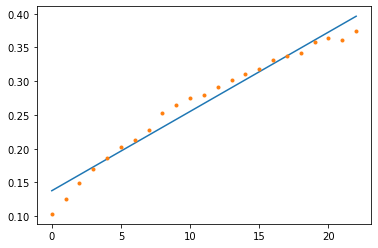

In [19]:
plt.plot(R,f.predict(R))
plt.plot(r,'.')

In [20]:
#기울기 계산
for i in range(len(r)):
    if((r[i+1]-r[i])/(i+1-i)<f.coef_):
        print("적절한 cluster 값은:", i, "입니다")
        ex=i
        break

적절한 cluster 값은: 5 입니다


#### #그러나 LinearRegression이 일정하게 되는 것이 아니라서 매 번 cluster 값이 달라짐.

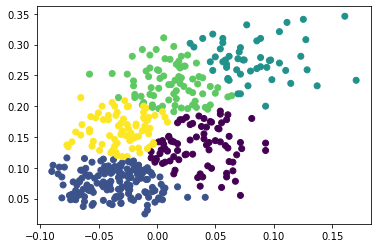

In [21]:
km = KMeans(n_clusters = ex)
X=[X_p,X_d]
data = np.transpose(X)
km.fit(data)
plt.scatter(X_p,X_d,c=km.labels_)